# Efficient Approximation of Pricing Functions
### Academic Supervisors: 
Abdul-Lateef Haji-Ali (HW, Mathematics), Aretha Teckentrup (UoE, Mathematics)
### Team members:
Jonny Spence, Martin Brolly, Gong Xue
#### Abstract: 
State-of-art best-practice pricing models in modern mathematical finance lack closed
form analytical solutions. Therefore, numerical methods – e.g. Monte Carlo, tree pricing, Fourier
(COS) pricing – are used to approximate their solutions. As the calibration of such models and
their application in risk management, asset and liability management, and portfolio optimization
typically require speedy generation of a large number of price scenarios, the trade-off struck by
practitioners between pricing accuracy and runtime favours fast numerics over precision. In
such situations, an approximate pricing function that is capable of quickly interpolating a price
with target accuracy from a training data generated offline can be an appropriate solution to
the modelling problem. The goal of this project is to test various interpolation methods on a
concrete problem.
* This project is in collaboration with Moody’s (https://www.moodys.com).

## 1. Overview
The target of this project is to test various methods to generate training data which help improve training speed. We will start by testing three methods: (i) multi-level Monte Carlo, (ii)least square approximation and (iii) guassian process. 

### 1.1 Black-Karasinski model
The model we are going to test on Black-Karasinski model. "Black and Karasinski (BK) develop a model, within a discrete timeframework, where the target rate, mean reversion rate and local volatility are deterministic functions of time. The specification of three time-dependent factors allows the future short-term interest rate volatilities to be specified independently of the initial volatility term structure... the short-term interest rate is assumed to have a lognormal distribution at any time horizon. The standard assumptions underlying perfect markets are also made."

The BK model may be written as: 
\begin{equation*}
\text{d}(\text{ln} r) = \alpha(\text{ln}\mu(t)-\text{ln} r)\text{d}t+\sigma \text{d}w
\end{equation*}

where 
* $\alpha$ is the speed of the mean reversion
* $\mu(t)$ is the target interest rate, i.e. the reversion level
* $\sigma$ the local volatility, i.e. the volatility of the short-term interest rate
* $dW$ ~ $N(0,1)$

The price function is given by 
\begin{equation*}
P(\alpha, T) = E[exp(-\int_{o}^{T} r(t) dt)]
\end{equation*}

### 1.2 Multi-level Monte-Carlo
Monte-Carlo is an method to estimate an expected value arising from a stochastic differential equation (SDE) through random sampling. multi-level Monte Carlo is a methode to reduce the computational complexity of Monte Carlo simulation using a geometric sequence of timesteps.




## 2. Simulation

### 2.1 Monte Carlo
Firstly we are going to use Monte Carlo method to generate training data to estimate $P(t)$. Parameters are $\alpha, \sigma, \mu$ and $T$. For each parameter, we will use 10 grids. 

In [6]:
# -*- coding: utf-8 -*-
"""
Spyder Editor

This is a temporary script file.
"""
%matplotlib notebook


# import library
import numpy as np
from random import seed
from numpy.random import randn
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# set the state of randn
seed(1)
# preallocate arrays


# initialize variables alpha, sigma, T
dt = 0.1
itr = 10000
alphaArray = np.arange(0.1, 1.1, 0.1)
sigmaArray = np.arange(0.1, 1.1, 0.1)
TArray = np.arange(0.1, 1.1, 0.1)

EP_Matrix = np.zeros((10,10,10))
Error_Matrix = np.zeros((10,10,10))
#for each alpha value
for a in range(10):
    alpha = alphaArray[a]
#for each sigma value
    for s in range(10):
        sigma = sigmaArray[s]
        lnr = np.zeros(itr)      
        integral = 0
#for each time
#simulate the SDE
        for i in range(10):
            dw = randn(itr)
            time = dt*(i+1)
            mu = math.sin(time)
            lnmu = math.log(mu)
            dlnr = alpha*(lnmu - lnr)*dt + sigma*dw
            lnr += dlnr #updae lnr
            r = np.exp(lnr)
            integral += r*dt #calculate interval integral of r
        #total integral
            Pt = np.exp(-integral)
            EP = np.mean(Pt)
            Error = np.std(Pt)/math.sqrt(itr)
            EP_Matrix[a,s,i] = EP
            Error_Matrix[a,s,i] = Error
#take average of P as an estimation of the expectation





<IPython.core.display.Javascript object>


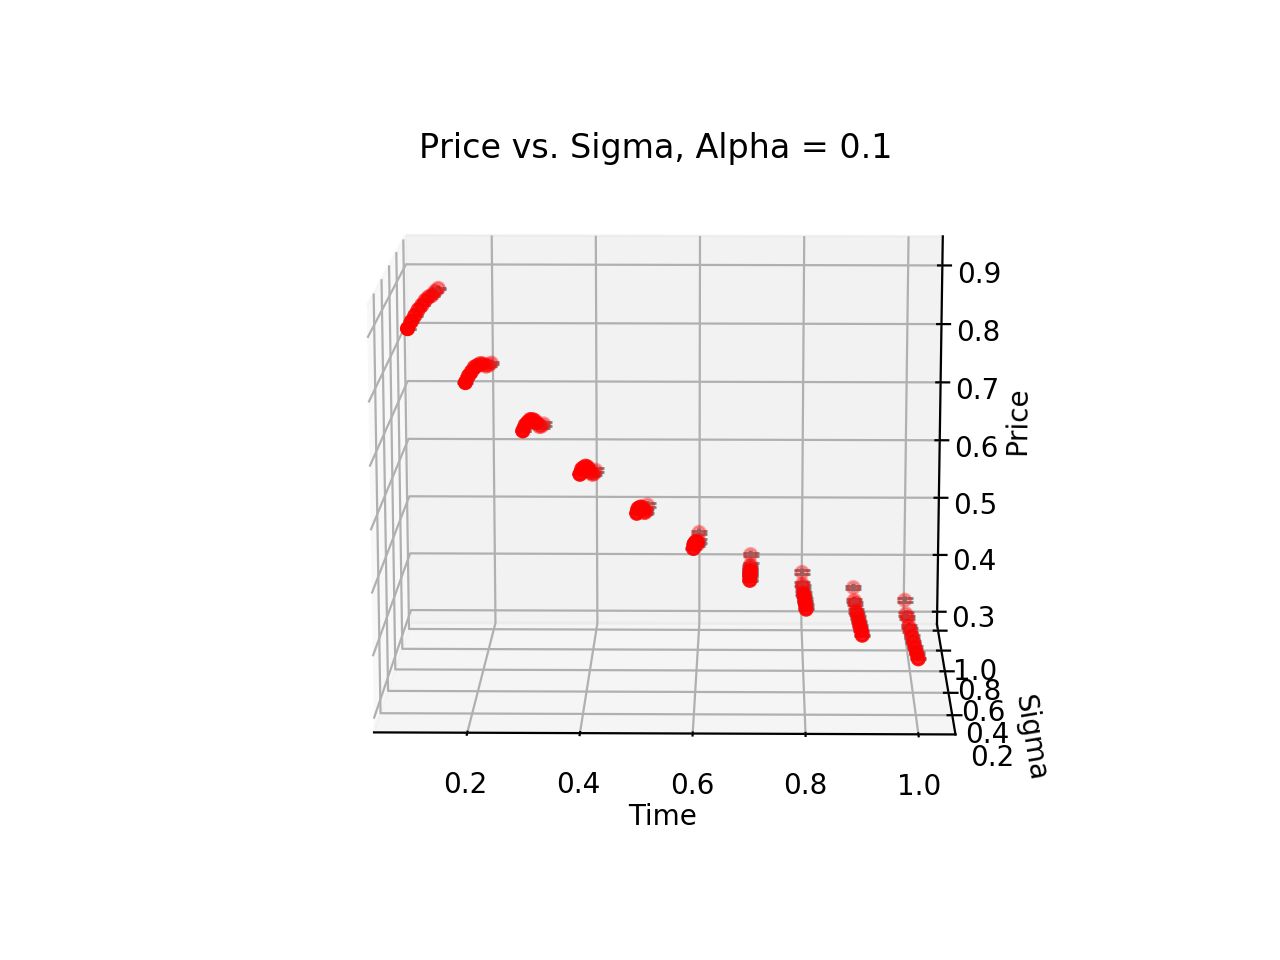

<IPython.core.display.Javascript object>


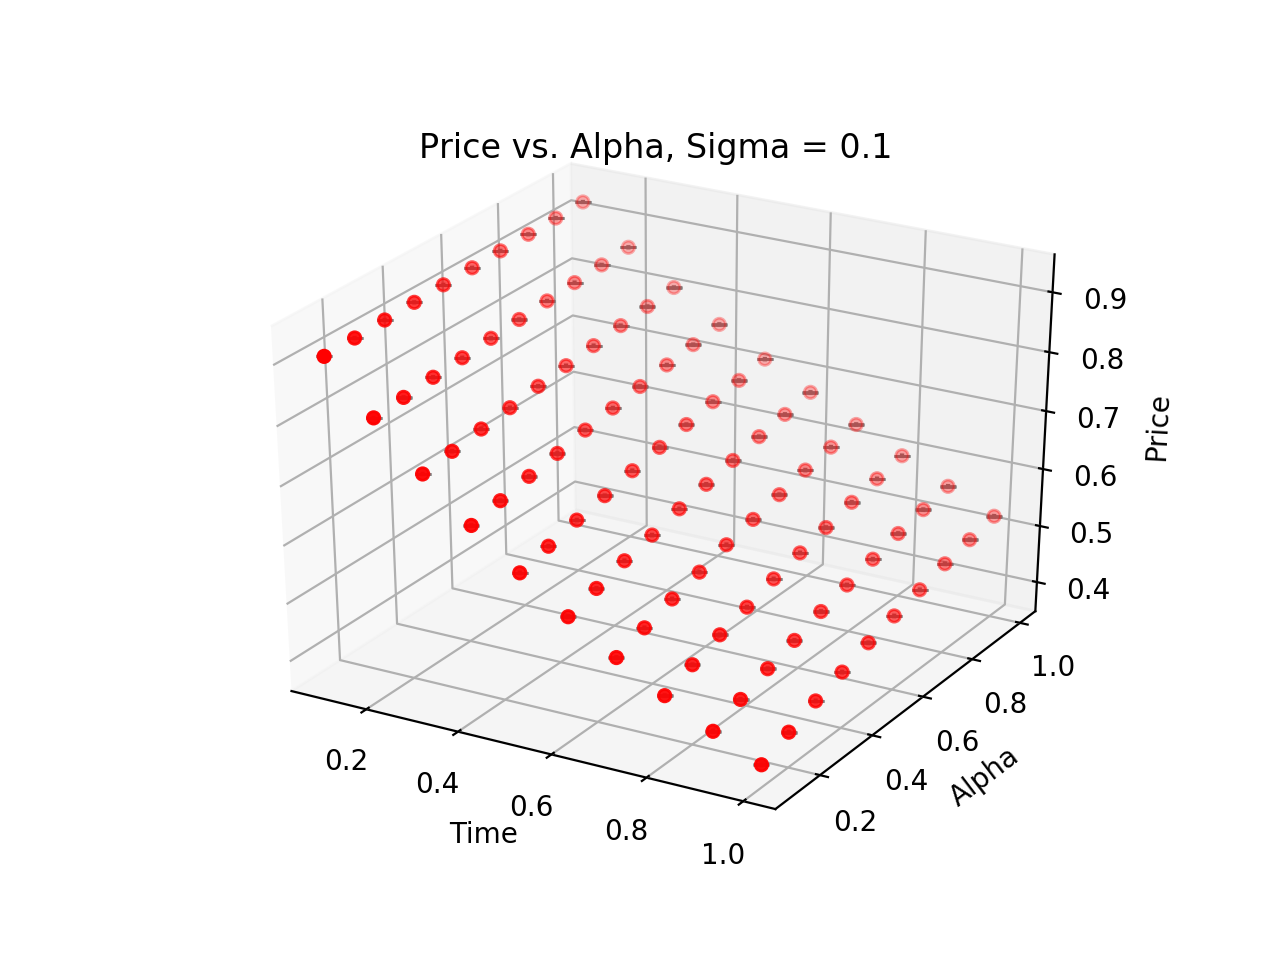

In [7]:
##plot it out on 3-d plots
            
##plot P, t, sigma
alphaID = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.tile(TArray,10) #t
y = np.repeat(sigmaArray,10) #sigma
z = EP_Matrix[alphaID].flatten() #P

zerror = Error_Matrix[alphaID].flatten() 


ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Sigma')
ax.set_zlabel('Price')
ax.set_title('Price vs. Sigma, Alpha = ' + str(alphaArray[alphaID]))

#plot errorbars
for i in np.arange(0, len(z)):
   ax.plot([x[i], x[i]], [y[i], y[i]], [z[i]+zerror[i], z[i]-zerror[i]], c='grey', marker="_")


plt.show()




            
##plot P, t, alpha
sigmaID = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.tile(TArray,10) #t
y = np.repeat(alphaArray,10) #alpha
z = EP_Matrix[:,sigmaID].flatten() #P

zerror = Error_Matrix[:,sigmaID].flatten() 


ax.scatter(x,y,z, c='r', marker='o')

ax.set_xlabel('Time')
ax.set_ylabel('Alpha')
ax.set_zlabel('Price')
ax.set_title('Price vs. Alpha, Sigma = ' + str(sigmaArray[sigmaID]))

#plot errorbars
for i in np.arange(0, len(z)):
   ax.plot([x[i], x[i]], [y[i], y[i]], [z[i]+zerror[i], z[i]-zerror[i]], c='grey', marker="_")


plt.show()


In [3]:
#interactive 2d plot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#def interactivePlot(alpha, sigma):
alpha = 0.5
sigma = 0.3

alphID = int(alpha/0.1)-1
sigmaID = int(sigma/0.1)-1
TArray = np.arange(0.1, 1.1, 0.1).flatten()
time = TArray
price = EP_Matrix[alphaID,sigmaID].flatten()
zerror = Error_Matrix[alphaID,sigmaID] 
print(TArray.shape())
print(time)
plt.plot(TArray, price, 'ro')
plt.show()

interact(interactivePlot,alpha=0.5,sigma=0.3)
    

NameError: name 'alphaID' is not defined

### 2.2 Multi-level Monte Carlo

## 6. References

[[1]](https://link.springer.com/chapter/10.1057/9781403946027_9) Svoboda S. (2004) The Black and Karasinski Model. In: Interest Rate Modelling. Finance and Capital Markets Series. Palgrave Macmillan, London]